In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # For better display of results

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR # Support Vector Regressor
from sklearn.linear_model import LinearRegression # Another option for a base learner

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [ ]:
# 1. Load and Preprocess the California Housing Dataset
print("Loading California Housing dataset...")
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target
print("Dataset loaded.")

Loading California Housing dataset...
Dataset loaded.


In [ ]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 16512 samples
Test set size: 4128 samples


In [ ]:

# 2. Define Multiple Base Estimators
# We'll create a dictionary where keys are names and values are the base estimator instances.
base_estimators = {
    "DecisionTree (Depth 6)": DecisionTreeRegressor(max_depth=6, random_state=42),
    "DecisionTree (Depth 10)": DecisionTreeRegressor(max_depth=10, random_state=42), # A slightly stronger weak learner
    "Linear SVR": SVR(kernel='linear', C=0.1), # A simple linear SVR as a weak learner
    # "Poly SVR (Degree 2)": SVR(kernel='poly', degree=2, C=0.1) # Another SVR option, more complex
}

results = {}

In [ ]:
# 3. Loop through Base Estimators, Train AdaBoost, and Evaluate
print("\n--- Training AdaBoost with Different Base Estimators ---")

for name, base_est in base_estimators.items():
    print(f"\nTraining AdaBoost with {name} as base estimator...")

    # Initialize AdaBoostRegressor
    # n_estimators and learning_rate might need tuning for each base estimator type.
    # For demonstration, we'll keep them relatively constant.
    adaboost_regressor = AdaBoostRegressor(
        estimator=base_est,
        n_estimators=100,      # Number of weak learners
        learning_rate=0.1,     # Contribution of each weak learner
        loss='linear',         # Loss function for updating weights
        random_state=42
    )

    adaboost_regressor.fit(X_train, y_train)
    y_pred = adaboost_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'MSE': mse, 'R2': r2}
    print(f"  MSE: ${mse:.4f}")
    print(f"  R-squared ($R^2$): ${r2:.4f}")


--- Training AdaBoost with Different Base Estimators ---

Training AdaBoost with DecisionTree (Depth 6) as base estimator...
  MSE: $0.3876
  R-squared ($R^2$): $0.7042

Training AdaBoost with DecisionTree (Depth 10) as base estimator...
  MSE: $0.2701
  R-squared ($R^2$): $0.7939

Training AdaBoost with Linear SVR as base estimator...
  MSE: $0.5454
  R-squared ($R^2$): $0.5838


In [ ]:
# 4. Display Comparative Results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\n--- Comparative Performance of AdaBoost with Different Base Estimators ---")
print(results_df)


--- Comparative Performance of AdaBoost with Different Base Estimators ---
                              MSE        R2
DecisionTree (Depth 6)   0.387596  0.704217
DecisionTree (Depth 10)  0.270067  0.793907
Linear SVR               0.545436  0.583767


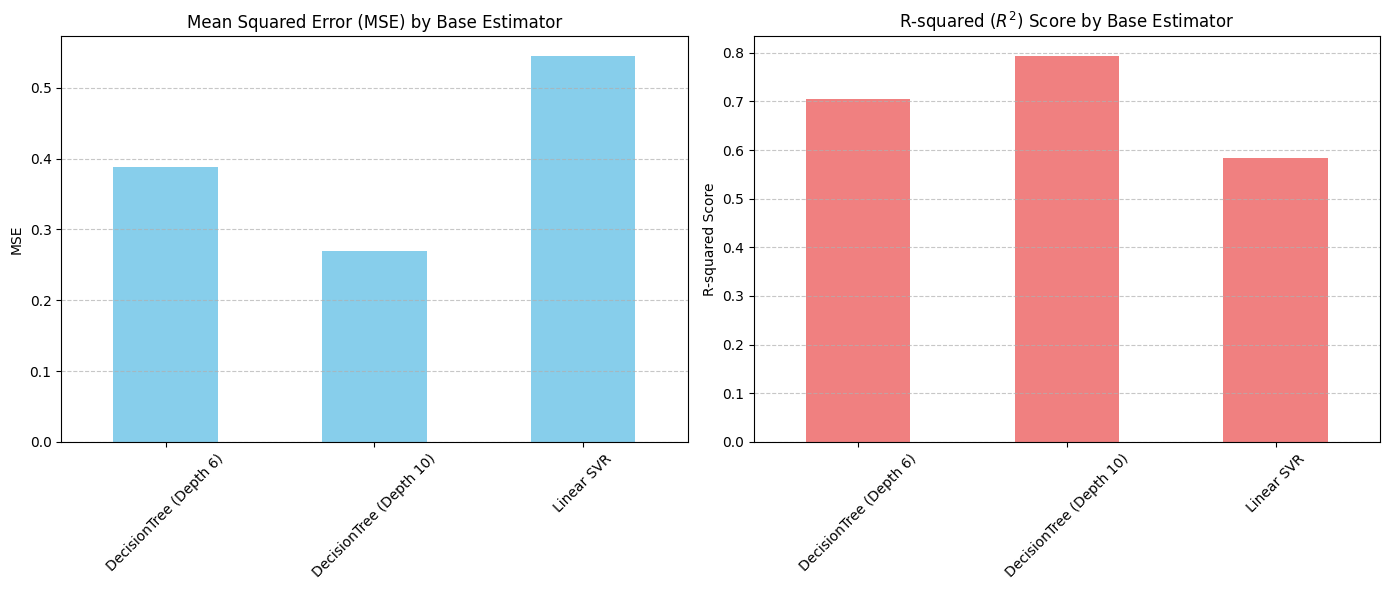

In [ ]:
# 5. Visualize Comparative Performance
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# MSE Comparison
results_df['MSE'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Mean Squared Error (MSE) by Base Estimator')
axes[0].set_ylabel('MSE')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# R-squared Comparison
results_df['R2'].plot(kind='bar', ax=axes[1], color='lightcoral')
axes[1].set_title('R-squared ($R^2$) Score by Base Estimator')
axes[1].set_ylabel('R-squared Score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
 print("\n--- Key Observation ---")
print("The plots show the Mean Squared Error (MSE) and R-squared ($R^2$) scores for AdaBoost when using different types of base estimators (Decision Trees with varying depths and a Linear SVR).")
print("You can observe how changing the complexity or nature of the weak learner impacts the overall performance of the AdaBoost ensemble.")
print("Typically, shallow decision trees (like max_depth=6 or 10) are strong candidates for weak learners in AdaBoost due to their balance of simplicity and expressiveness.")


--- Key Observation ---
The plots show the Mean Squared Error (MSE) and R-squared ($R^2$) scores for AdaBoost when using different types of base estimators (Decision Trees with varying depths and a Linear SVR).
You can observe how changing the complexity or nature of the weak learner impacts the overall performance of the AdaBoost ensemble.
Typically, shallow decision trees (like max_depth=6 or 10) are strong candidates for weak learners in AdaBoost due to their balance of simplicity and expressiveness.
